# Task 2: Unsupervised Learning

## Predicting the Species of flower using the famous IRIS datset 
#### Here I will be using the KMeans Clustering to predict species based on Sepal length, Sepal width, Petal Length and Petal width

## Importing Relevan tLibraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

## Importing the dataset 

In [2]:
data=pd.read_csv('iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Cleaning 

### Firstly we will find if there is any missing values 

In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Note: There are no missing values so we can move forward with removing irrelevant features 

##### Note: Here the 'ID' column is the most irrelevant column so removing it will be better for themodel or else it will capture noise.
#### Also, the Species is a dependent variable

In [6]:
data.drop('Species', axis=1,inplace=True)

In [5]:
data.drop('Id', axis=1, inplace=True)

## Data Visuals before predictions

Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

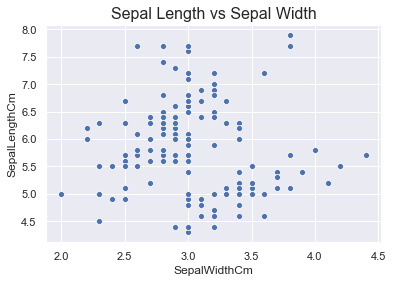

In [7]:
sns.scatterplot(x=data.SepalWidthCm, y=data.SepalLengthCm)
plt.title('Sepal Length vs Sepal Width', fontsize=16)

Text(0.5, 1.0, 'Petal Length vs Petal Width')

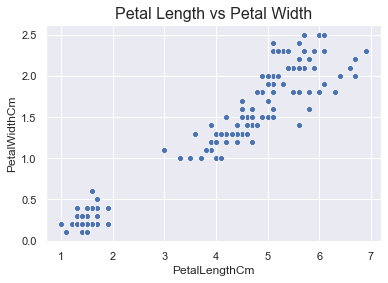

In [8]:
sns.scatterplot(x=data.PetalLengthCm, y=data.PetalWidthCm)
plt.title('Petal Length vs Petal Width', fontsize=16)

Text(0.5, 1.0, 'Petal Length vs Sepal Length')

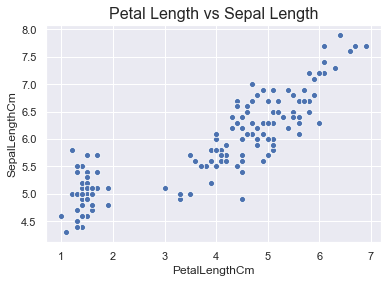

In [9]:
sns.scatterplot(x=data.PetalLengthCm , y=data.SepalLengthCm)
plt.title('Petal Length vs Sepal Length', fontsize=16)

Text(0.5, 1.0, 'Petal Width vs Sepal Width')

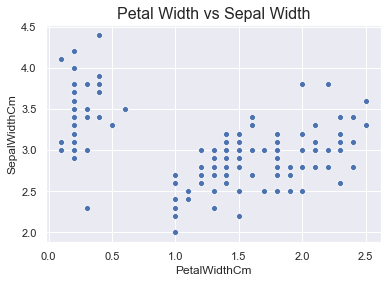

In [10]:
sns.scatterplot(x=data.PetalWidthCm , y=data.SepalWidthCm)
plt.title('Petal Width vs Sepal Width', fontsize=16)

Text(0.5, 1.0, 'Petal Length vs Sepal Width')

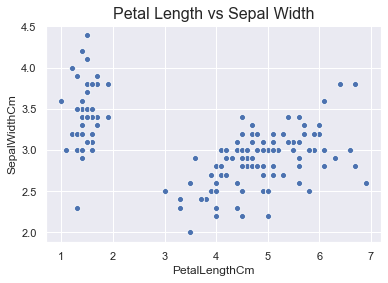

In [11]:
sns.scatterplot(x=data.PetalLengthCm , y=data.SepalWidthCm)
plt.title('Petal Length vs Sepal Width', fontsize=16)

Text(0.5, 1.0, 'Petal Width vs Sepal Length')

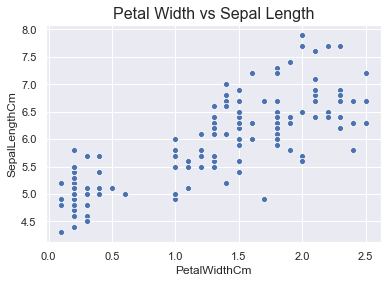

In [12]:
sns.scatterplot(x=data.PetalWidthCm , y=data.SepalLengthCm)
plt.title('Petal Width vs Sepal Length', fontsize=16)

In [13]:
from sklearn.cluster import KMeans

In [14]:
X=data.iloc[:,1:5].values

## Finding the best value of K

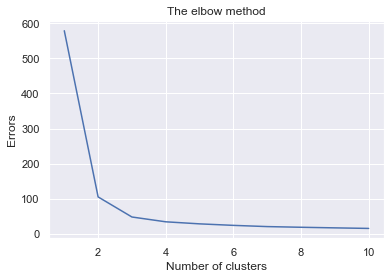

In [15]:
Errors = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 100, random_state = 0)
    kmeans.fit(X)
    Errors.append(kmeans.inertia_)
plt.plot(range(1, 11), Errors)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Errors') 
plt.show()

### Note: Here we can see that the optimum value that we can take for clustering is between 2 and 4 so taking K=3 should be a better option 

In [16]:
model=KMeans(n_clusters=3)

In [17]:
model.fit(X)

KMeans(n_clusters=3)

In [18]:
y_pred=model.predict(X)

## Data Visuals after predictions 

Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

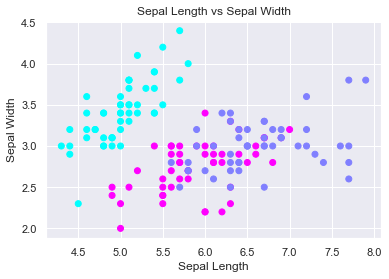

In [19]:
plt.scatter(x=data.SepalLengthCm ,y=data.SepalWidthCm, c=model.labels_, cmap='cool')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')

Text(0.5, 1.0, 'Petal Length vs Petal Width')

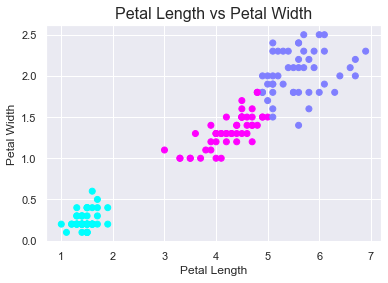

In [20]:
plt.scatter(x=data.PetalLengthCm ,y=data.PetalWidthCm, c=model.labels_, cmap='cool')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width',fontsize=16)

Text(0.5, 1.0, 'Petal Length vs Sepal Width')

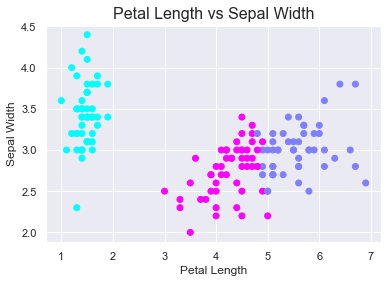

In [21]:
plt.scatter(x=data.PetalLengthCm ,y=data.SepalWidthCm, c=model.labels_, cmap='cool')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.title('Petal Length vs Sepal Width', fontsize=16)

Text(0.5, 1.0, 'Petal Width vs Sepal Length')

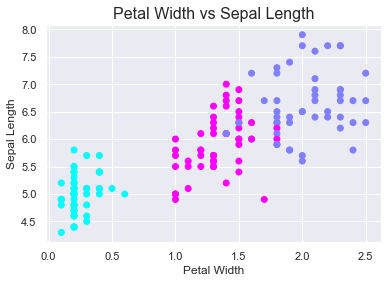

In [22]:
plt.scatter(x=data.PetalWidthCm ,y=data.SepalLengthCm, c=model.labels_, cmap='cool')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.title('Petal Width vs Sepal Length', fontsize=16)